## Set up your environment

Before we can run any code, we need to set up our development environment. This means installing libraries -- or other people's code -- that our own code will call.

`pip` is a package management tool the Python coding language.

`torch` is one of the primary Machine Learning libraries that AI models are built from.

`transformers` is the HuggingFace library that provides code that makes it easy to use different models in your own code.

`pillow` is an imaging library used to open, display, create, and manipulate images in Python.

In [1]:
%pip install -U "torch==2.7.0" torchvision transformers pillow ipywidgets

  Using cached torchvision-0.22.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.1 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


## Import Statements

Our code will run code from other libraries. These libraries need to be imported before they can be used. It is best practice to place `import` statements before any of your own code.

In [2]:
import torch
import PIL.Image
from IPython.display import display, Image
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image


## Choose a Model

AI advancements are being made every day, and AI models are constantly being created/updated. When choosing a model, there are a few key factors to consider:

1. The most important factor in choosing a model is picking one that can **solve your problem given your type of inputs**. If you want to classify images, you'll need a vision model; a chatbot needs a model with Text-to-Text capabilities; some models are "multimodal", meaning they can output predictions from multiple types of input (text, video, audio, images, etc.).
2. The next most important factor is picking a model that's the **right "size" for your environment**. The size of the model is usually measured in the number of **parameters** it uses, with the largest AI models measuring hundreds of billions and the smallest ones being hundreds of thousands. More parameters require more RAM. In my experience, a newer laptop with 48GB of RAM can run a model with 20B parameters slowly; mobile devices can run models up to 7B parameters.
3. Finally, test different models against your data. The models you get from HuggingFace are **pretrained**. The output generated by a model depends a lot on the data it saw during the pretraining step. Since different model providers use different data sets during pretraining, you won't know what kind of response you'll get from a model until you try it!

In [3]:
# Choose an Image-Text-to-Text Multimodal Model
MODEL_ID = "HuggingFaceTB/SmolVLM-Instruct"  # @param ["HuggingFaceTB/SmolVLM-Instruct", "moonshotai/Kimi-VL-A3B-Instruct", "Qwen/Qwen2.5-VL-7B-Instruct"] {"allow-input": true, "isTemplate": true}
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(DEVICE)

cpu


## Initialize the model and the inference pipeline

Data in a computer is represented in binary -- or 1's and 0's. This includes images, text, audio, video, and everything inbetween. For example, when a photo is saved on your phone, the light information captured by the camera sensor is converted into binary and a program interprets that binary to display a picture on the screen.

Similarly, Machine Learning models need data in the form of **tensors**. These are large matrices -- or lists of lists of lists of... -- of numbers, usually between 0 and 1. When you chat with AI, your words are converted to tensors, the AI responds in tensors, and a program interprets the result as natural language. This process is called the **inference pipeline**. The inference part comes from the fact that the AI model is attempting to infer the next word in the conversation, based on what's already been said.

Because this process is so common in AI development, there are libraries that reduce all of these steps (and more!) into a few lines of code.

In [4]:
processor = AutoProcessor.from_pretrained(MODEL_ID)
model = AutoModelForVision2Seq.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.bfloat16,
    _attn_implementation="flash_attention_2" if DEVICE == "cuda" else "eager",
).to(DEVICE)

## Construct a Prompt

Prompts are natural language instructions given to an AI agent that determine what type of task it should perform and how it should respond. The phrasing of a prompt can have dramatic impact on the output generated. Prompts need to balance between being thorough and concise

In [11]:
picture_prompt = """
    You are an AI visual assistant. Your task is to describe an image provided by the user.
"""

## Initialize the Input

Create variables that contain the input that will be provided to the AI Agent.

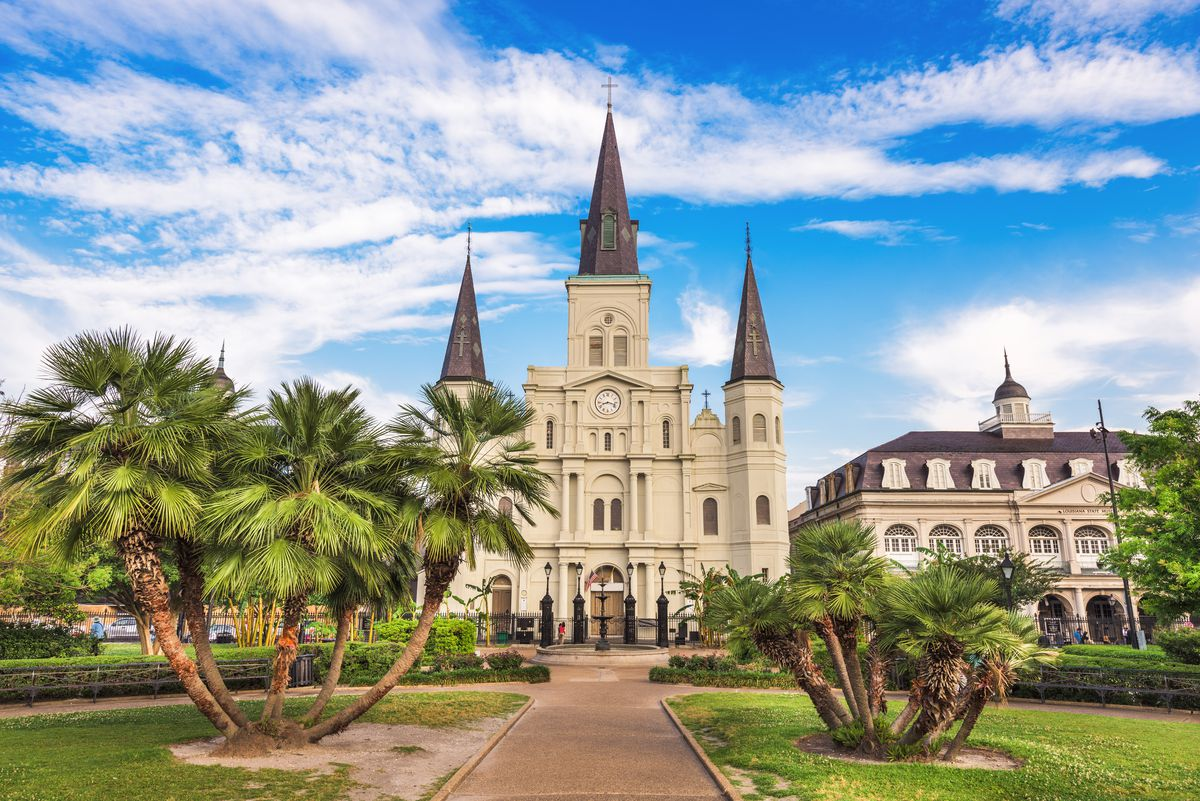

In [10]:
img = PIL.Image.open('sample.jpg')
input_text = """
    Can you describe the scene in the picture?
"""

display(Image('sample.jpg', width=300))

In [12]:
messages = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": picture_prompt}
        ]
    },
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": input_text}
        ]
    }
]

## Process the input

This stage prepares the input for the model to perform predictions on. There can be many steps to this process including batching, tokenization, and masking. Once the inputs have been processed, the print statement shows how they have been converted into tensors for the Machine Learning Model.

In [13]:
prompt = processor.apply_chat_template(messages, add_generation_prompt=False)
inputs = processor(text=prompt, images=[img], return_tensors="pt")
inputs = inputs.to(DEVICE)

print(inputs)

{'pixel_values': tensor([[[[[-0.3647, -0.3647, -0.3490,  ...,  0.7569,  0.7569,  0.7490],
           [-0.3098, -0.3098, -0.2941,  ...,  0.7569,  0.7569,  0.7569],
           [-0.1843, -0.1843, -0.1765,  ...,  0.7569,  0.7569,  0.7647],
           ...,
           [ 0.3176,  0.3255,  0.3412,  ...,  0.9137,  0.9137,  0.8980],
           [ 0.3804,  0.3804,  0.4039,  ...,  0.8980,  0.8980,  0.8902],
           [ 0.4902,  0.4824,  0.4824,  ...,  0.8902,  0.8902,  0.8902]],

          [[ 0.0980,  0.0980,  0.1216,  ...,  0.7569,  0.7569,  0.7490],
           [ 0.1451,  0.1451,  0.1529,  ...,  0.7569,  0.7569,  0.7569],
           [ 0.2392,  0.2392,  0.2392,  ...,  0.7569,  0.7569,  0.7647],
           ...,
           [ 0.5373,  0.5451,  0.5608,  ...,  0.8902,  0.8980,  0.8824],
           [ 0.5608,  0.5608,  0.5765,  ...,  0.8824,  0.8824,  0.8745],
           [ 0.6314,  0.6314,  0.6235,  ...,  0.8745,  0.8745,  0.8745]],

          [[ 0.6941,  0.6941,  0.7176,  ...,  0.8510,  0.8510,  0.8431]

In [14]:
# Perform inference and generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=5000)

print(generated_ids)

tensor([[    1, 18403,    42,  ...,  1194,    30, 49154]])


In [15]:
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])

System: 
    You are an AI visual assistant. Your task is to describe an image provided by the user.

User:<image>    Can you describe the scene in the picture?

The image depicts a beautiful outdoor scene featuring a prominent church building in the center. The church is a large, majestic structure with a classical architectural style. It has a symmetrical design, with a central nave flanked by two smaller aisles. The nave is topped by a large, pointed roof, and the aisles are adorned with arched windows. The church is surrounded by lush greenery, with palm trees and other tropical plants adding a tropical touch to the scene.

In the foreground, there is a wide, paved path leading up to the church. The path is lined with palm trees and other tropical plants, creating a serene and inviting atmosphere. On either side of the path, there are benches where visitors can sit and enjoy the view. The sky above is a clear blue, with scattered white clouds, indicating a pleasant day.

To the lef